# Problem
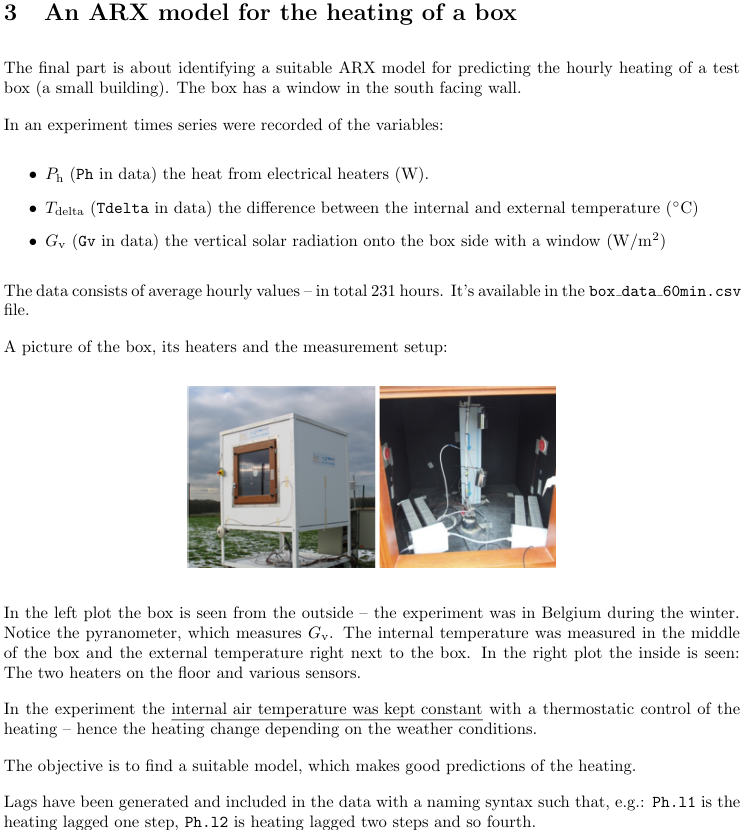

### Lags

In the context of the provided text, "lags" refer to previous time steps of a variable that are included in a model to account for its historical influence. For example, in time series analysis or predictive modeling, lagged values (denoted as .l1, .l2, etc.) represent the variable at earlier points in time. This is particularly relevant in the ARX (AutoRegressive with eXogenous inputs) model described in the assignment.

In the assignment's section on the heating of a box, lagged variables like Ph.l1, Ph.l2, and so on are mentioned. These represent the heating values from one or more time steps before the current observation. The inclusion of these lags helps in analyzing dependencies and improving predictions by capturing the delayed effect of variables over time.

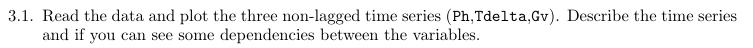

check
   thour                tdate  Ph     Tdelta        Gv  Ph.l0  Ph.l1  Ph.l2  \
0     19  2013-01-30 02:00:00  56  13.253583 -0.498643     56     55     57   
1     20  2013-01-30 03:00:00  54  13.181458 -1.127035     54     56     55   

   Ph.l3  Ph.l4  ...     Gv.l1     Gv.l2     Gv.l3     Gv.l4     Gv.l5  \
0     57     58  ... -0.499338 -0.417959 -0.221011 -0.453375 -0.747238   
1     57     57  ... -0.498643 -0.499338 -0.417959 -0.221011 -0.453375   

      Gv.l6     Gv.l7     Gv.l8     Gv.l9     Gv.l10  
0 -0.669267 -0.451776 -0.142700  8.262339  20.475484  
1 -0.747238 -0.669267 -0.451776 -0.142700   8.262339  

[2 rows x 38 columns]

~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   thour       231 non-null    int64  
 1   tdate       231 non-null    object 
 2   Ph          231 non-null    int64  
 3   Tdelta      231 non-null   

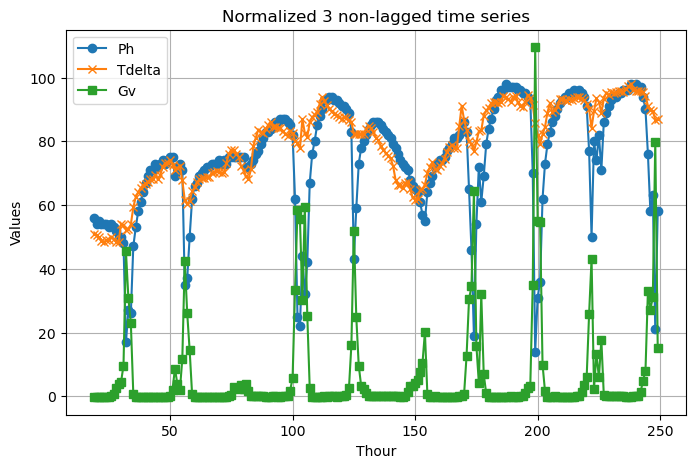

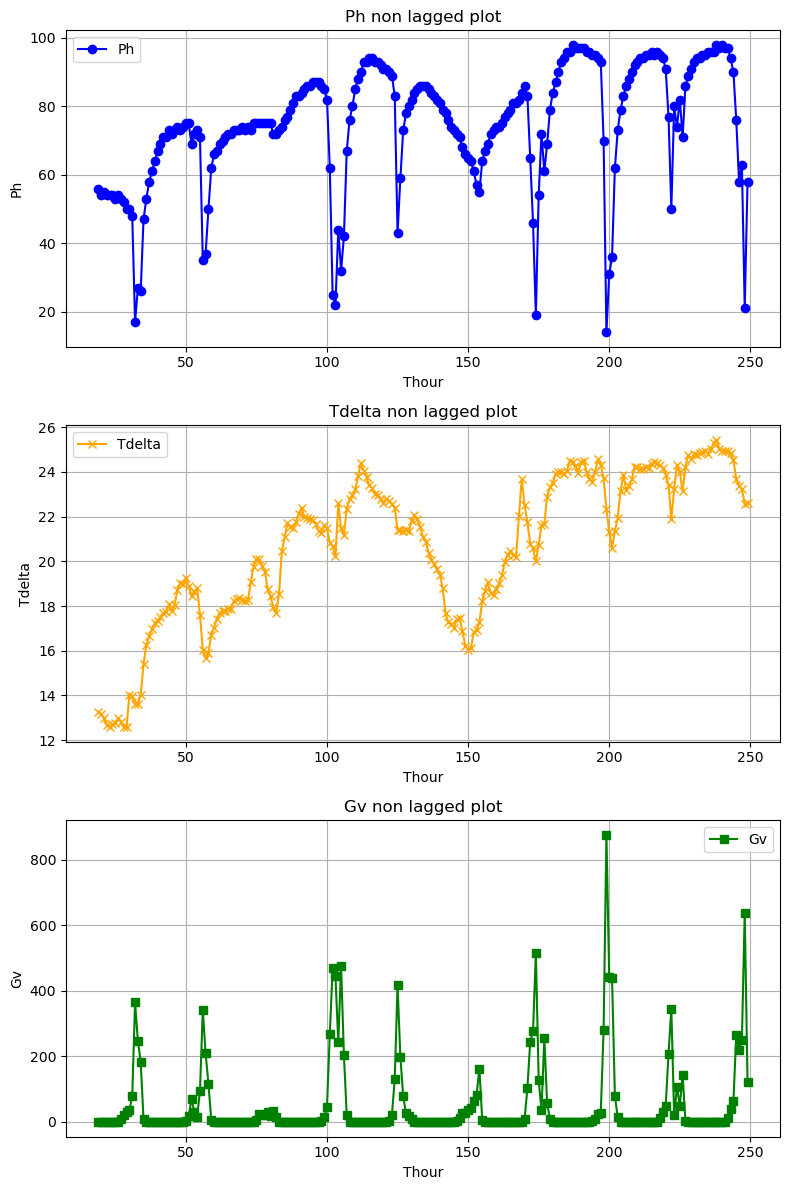

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('check')

# read data
df=pd.read_csv('box_data_60min.csv')

# data info
print(df.head(2))
print('\n~')
print(df.info())
print('\n~')

# data plot

plt.figure(figsize=(8, 5))
plt.plot(df['thour'], df['Ph'], label='Ph', marker='o')
plt.plot(df['thour'], df['Tdelta']*(100/26), label='Tdelta', marker='x')
plt.plot(df['thour'], df['Gv']*(100/800), label='Gv', marker='s')
plt.xlabel('Thour')
plt.ylabel('Values')
plt.title('Normalized 3 non-lagged time series')
plt.legend()
plt.grid()
plt.show()

# Creating subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plotting the first subplot
axes[0].plot(df['thour'], df['Ph'], label='Ph', marker='o', color='blue')
axes[0].set_title('Ph non lagged plot')
axes[0].set_xlabel('Thour')
axes[0].set_ylabel('Ph')
axes[0].grid()
axes[0].legend()

# Plotting the second subplot 
axes[1].plot(df['thour'], df['Tdelta'], label='Tdelta', marker='x', color='orange')
axes[1].set_title('Tdelta non lagged plot')
axes[1].set_xlabel('Thour')
axes[1].set_ylabel('Tdelta')
axes[1].grid()
axes[1].legend()

# Plotting the third subplot 
axes[2].plot(df['thour'], df['Gv'], label='Gv', marker='s', color='green')
axes[2].set_title('Gv non lagged plot')
axes[2].set_xlabel('Thour')
axes[2].set_ylabel('Gv')
axes[2].grid()
axes[2].legend()

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()


Plotting the Time Series: You are expected to graph these three variables over time to observe their behavior. This includes their trends, fluctuations, or any patterns (e.g., seasonal or cyclic variations).

Dependency Identification: Dependencies may be investigated by observing how changes in one variable might relate to changes in another. For instance:

Does higher Gv (solar radiation) reduce Ph (required heating) because the box gets warmed by sunlight?

Does a larger Tdelta (temperature difference) increase Ph because greater heating might be needed to maintain a constant internal temperature?

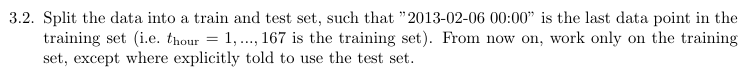

In [68]:
# split data
print('initial data dimensions: ',np.shape(df))

split_row= df.index[df['tdate']=="2013-02-06 00:00:00"].tolist()[0]
print('Spliting element(must be in train): ',split_row)

# Split the DataFrame
df_train = df.iloc[:split_row]  # Rows before the specified index
df_test = df.iloc[split_row:]  # Rows from the specified index onwards

# Printing the results
print("\ntraining data dimensions:")
print(np.shape(df_train))

print("\ntesting data dimensions:")
print(np.shape(df_test))


initial data dimensions:  (231, 38)
Spliting element(must be in train):  166

training data dimensions:
(166, 38)

testing data dimensions:
(65, 38)


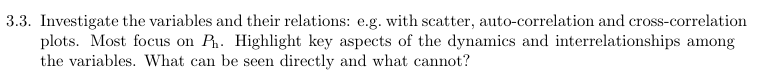

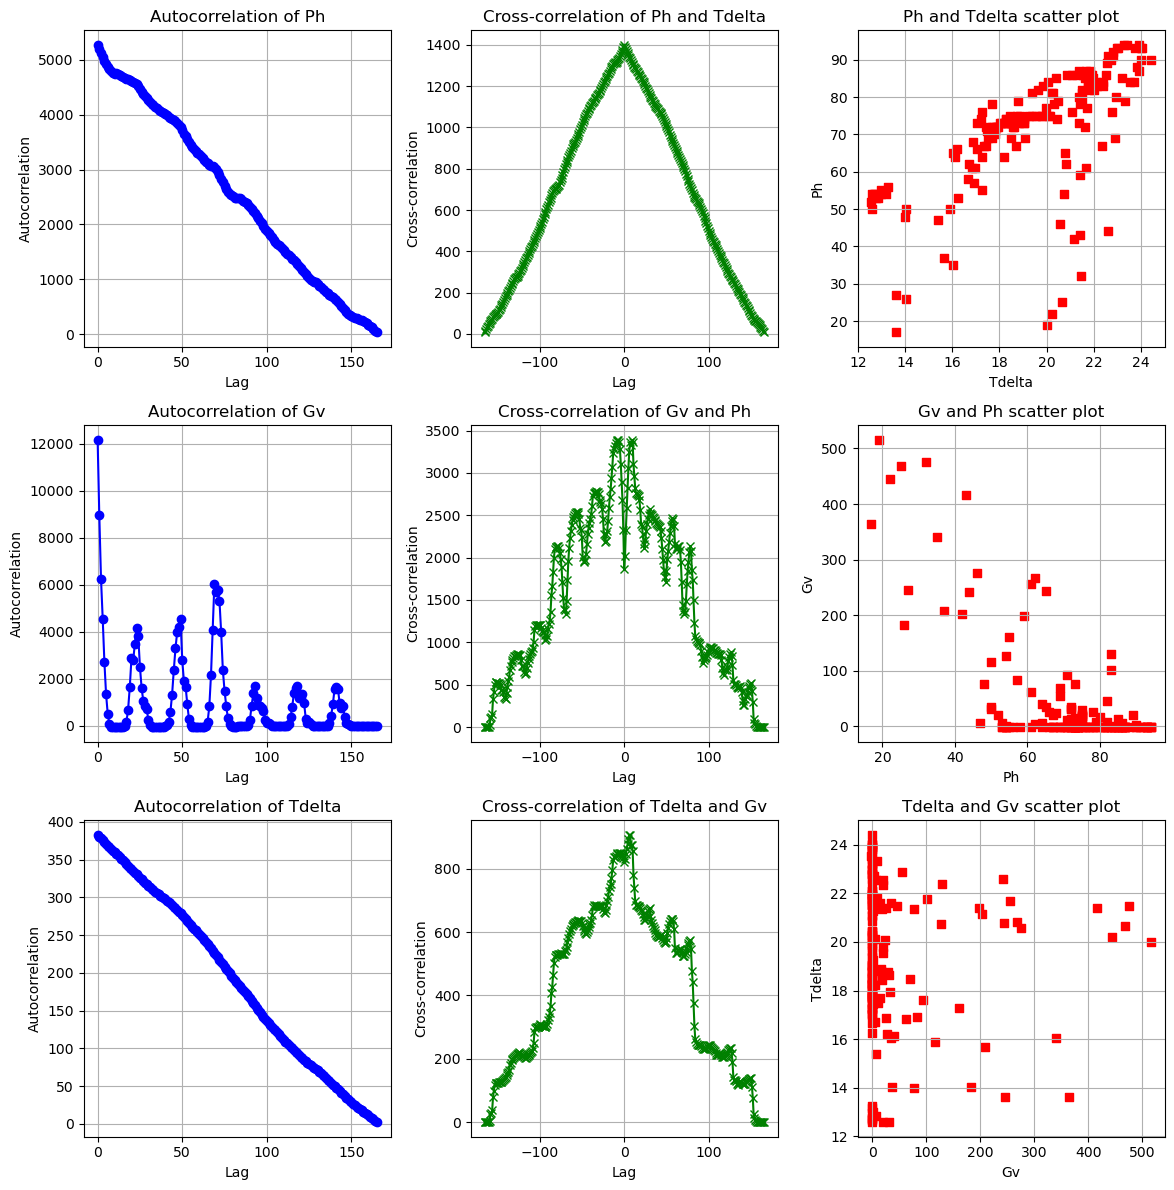

In [69]:
# Autocorrelation function
def autocorrelation(psignal):
    signal=np.array(psignal)
    n = len(signal)
    result = np.correlate(signal, signal, mode='full')  # Perform correlation with itself
    return result[result.size // 2:] / n

# Cross-correlation function
def cross_correlation(psignal1, psignal2):
    signal1=np.array(psignal1)
    signal2=np.array(psignal2)
    n = len(signal1)
    result = np.correlate(signal1, signal2, mode='full')  # Perform correlation between two signals
    return result / n

# Creating subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Calculate autocorrelation and cross-correlation
autocorr_x = autocorrelation(df_train['Ph'])
cross_corr_xy = cross_correlation(df_train['Ph'], df_train['Tdelta'])
# Plotting the first subplot
axes[0][0].plot(autocorr_x, marker='o', color='blue')
axes[0][0].set_title('Autocorrelation of Ph')
axes[0][0].set_xlabel('Lag')
axes[0][0].set_ylabel('Autocorrelation')
axes[0][0].grid()
#axes[0][0].legend()

lags = np.arange(-len(df_train['Ph']) + 1, len(df_train['Ph']))  # Define lags for cross-correlation
axes[0][1].plot(lags, cross_corr_xy, marker='x', color='green')
axes[0][1].set_title('Cross-correlation of Ph and Tdelta')
axes[0][1].set_xlabel('Lag')
axes[0][1].set_ylabel('Cross-correlation')
axes[0][1].grid()
#axes[0][1].legend()

axes[0][2].scatter(df_train['Tdelta'], df_train['Ph'], marker='s', color='red')
axes[0][2].set_title('Ph and Tdelta scatter plot')
axes[0][2].set_xlabel('Tdelta')
axes[0][2].set_ylabel('Ph')
axes[0][2].grid()
#axes[0][2].legend()

# Calculate autocorrelation and cross-correlation
autocorr_x = autocorrelation(df_train['Gv'])
cross_corr_xy = cross_correlation(df_train['Ph'], df_train['Gv'])
# Plotting the first subplot
axes[1][0].plot(autocorr_x, marker='o', color='blue')
axes[1][0].set_title('Autocorrelation of Gv')
axes[1][0].set_xlabel('Lag')
axes[1][0].set_ylabel('Autocorrelation')
axes[1][0].grid()
#axes[1][0].legend()

lags = np.arange(-len(df_train['Ph']) + 1, len(df_train['Ph']))  # Define lags for cross-correlation
axes[1][1].plot(lags, cross_corr_xy, marker='x', color='green')
axes[1][1].set_title('Cross-correlation of Gv and Ph')
axes[1][1].set_xlabel('Lag')
axes[1][1].set_ylabel('Cross-correlation')
axes[1][1].grid()
#axes[1][1].legend()

axes[1][2].scatter(df_train['Ph'], df_train['Gv'], marker='s', color='red')
axes[1][2].set_title('Gv and Ph scatter plot')
axes[1][2].set_xlabel('Ph')
axes[1][2].set_ylabel('Gv')
axes[1][2].grid()
#axes[1][2].legend()

# Calculate autocorrelation and cross-correlation
autocorr_x = autocorrelation(df_train['Tdelta'])
cross_corr_xy = cross_correlation(df_train['Tdelta'], df_train['Gv'])
# Plotting the first subplot
axes[2][0].plot(autocorr_x, marker='o', color='blue')
axes[2][0].set_title('Autocorrelation of Tdelta')
axes[2][0].set_xlabel('Lag')
axes[2][0].set_ylabel('Autocorrelation')
axes[2][0].grid()
#axes[2][0].legend()

lags = np.arange(-len(df_train['Tdelta']) + 1, len(df_train['Tdelta']))  # Define lags for cross-correlation
axes[2][1].plot(lags, cross_corr_xy, marker='x', color='green')
axes[2][1].set_title('Cross-correlation of Tdelta and Gv')
axes[2][1].set_xlabel('Lag')
axes[2][1].set_ylabel('Cross-correlation')
axes[2][1].grid()
#axes[2][1].legend()

axes[2][2].scatter(df_train['Gv'], df_train['Tdelta'], marker='s', color='red')
axes[2][2].set_title('Tdelta and Gv scatter plot')
axes[2][2].set_xlabel('Gv')
axes[2][2].set_ylabel('Tdelta')
axes[2][2].grid()
#axes[2][2].legend()

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()

Scatter Plots: These are used to visualize dependencies between variables. For example, plotting Ph (heat from electrical heaters) against Gv (vertical solar radiation) can reveal if solar radiation reduces the heating required for the box.

Auto-correlation Plots: These plots examine how a single variable (like Ph) correlates with itself over different time lags. They help determine whether the variable has a repetitive or cyclical pattern and identify stationarity.

Cross-correlation Plots: These show the relationship between two variables over varying time lags. For instance, the cross-correlation of Ph and Gv can indicate whether solar radiation's effect on heating has a delayed impact.

Analyzing these plots provides valuable insights into the dynamics and interactions of the variables mentioned in the experiment (e.g., Ph, Tdelta, and Gv). If you'd like further guidance on using these plots for your analysis, feel free to ask!

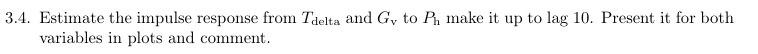

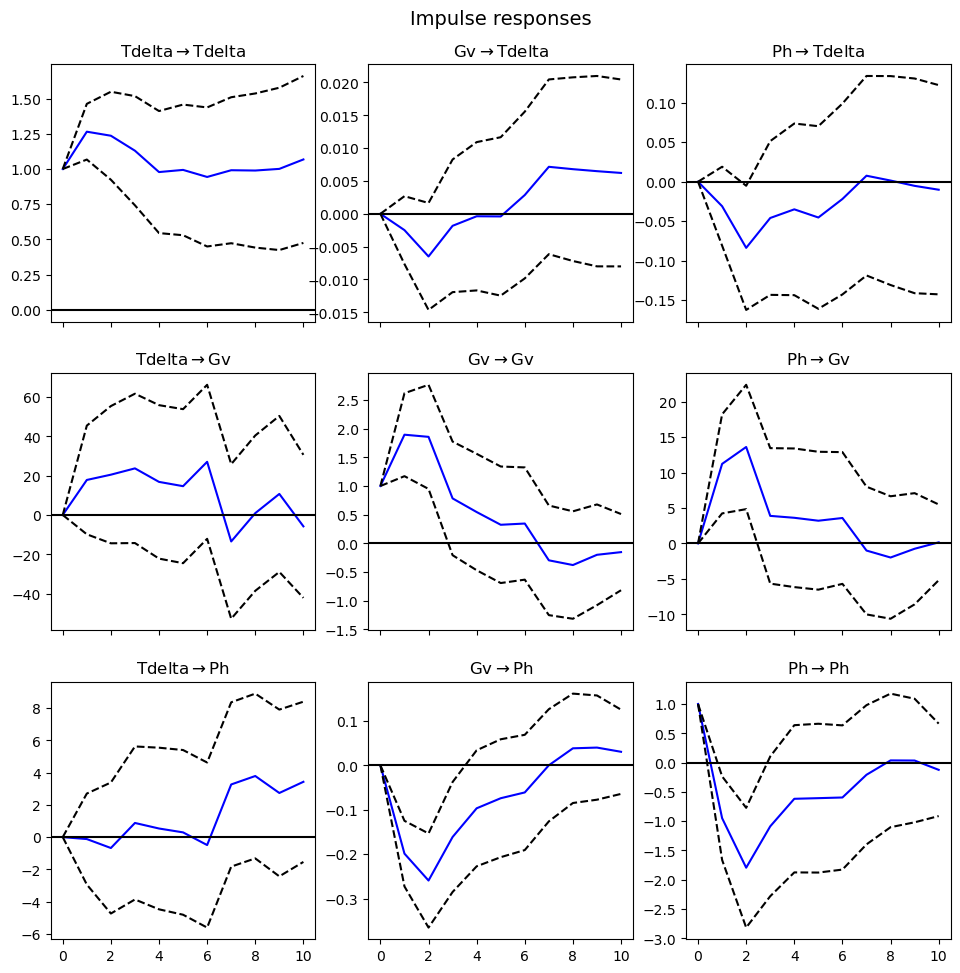

In [70]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Fit a VAR model
model = VAR(df_train[['Tdelta', 'Gv', 'Ph']])
results = model.fit(maxlags=10)

# Calculate impulse response up to lag 10
irf = results.irf(10)

# Plot impulse response
fig = irf.plot(orth=False)

plt.show()


Commentary on the Impulse Response
- The impulse response function (IRF) shows the effect of a one-unit shock in the variables Tdelta or Gv on Ph over time (lags).
- For both Tdelta and Gv, the IRF plots will show:- The magnitude and duration of the effect.
- Whether the impact stabilizes, amplifies, or oscillates over time.
- Any potential dependencies or causal relationships.


Analysis of Results
After running this analysis:
- If the IRF dies down and stabilizes over time, it indicates that the shock's effect is temporary, returning Ph to equilibrium.
- Persistent or amplifying responses may suggest a more sustained relationship or feedback between variables.
- Oscillatory behavior could imply cyclical dependencies or delays in interactions.

Imagine tapping a bowl of water. That tap (the "impulse") creates ripples (the "response") that spread out and gradually fade away. The impulse response tells us how strong those ripples are and how long they last.In the heating experiment you're working on, the impulse response helps measure how a small change in temperature difference (Tdelta) or solar radiation (Gv) affects the heating (Ph) over time—like ripples from a tap. It shows how quickly the effect appears, how strong it is, and how long it takes to fade.


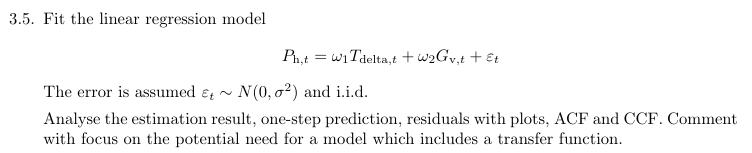

C:\Users\georg\AppData\Local\Temp\ipykernel_5252\3715126958.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dlr["Predicted_Ph"] = model.predict(X)
C:\Users\georg\AppData\Local\Temp\ipykernel_5252\3715126958.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dlr["Residuals"] = y - dlr["Predicted_Ph"]


                            OLS Regression Results                            
Dep. Variable:                     Ph   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     710.4
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           3.28e-81
Time:                        17:26:36   Log-Likelihood:                -507.24
No. Observations:                 166   AIC:                             1020.
Df Residuals:                     163   BIC:                             1030.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3991      2.658      4.288      0.0

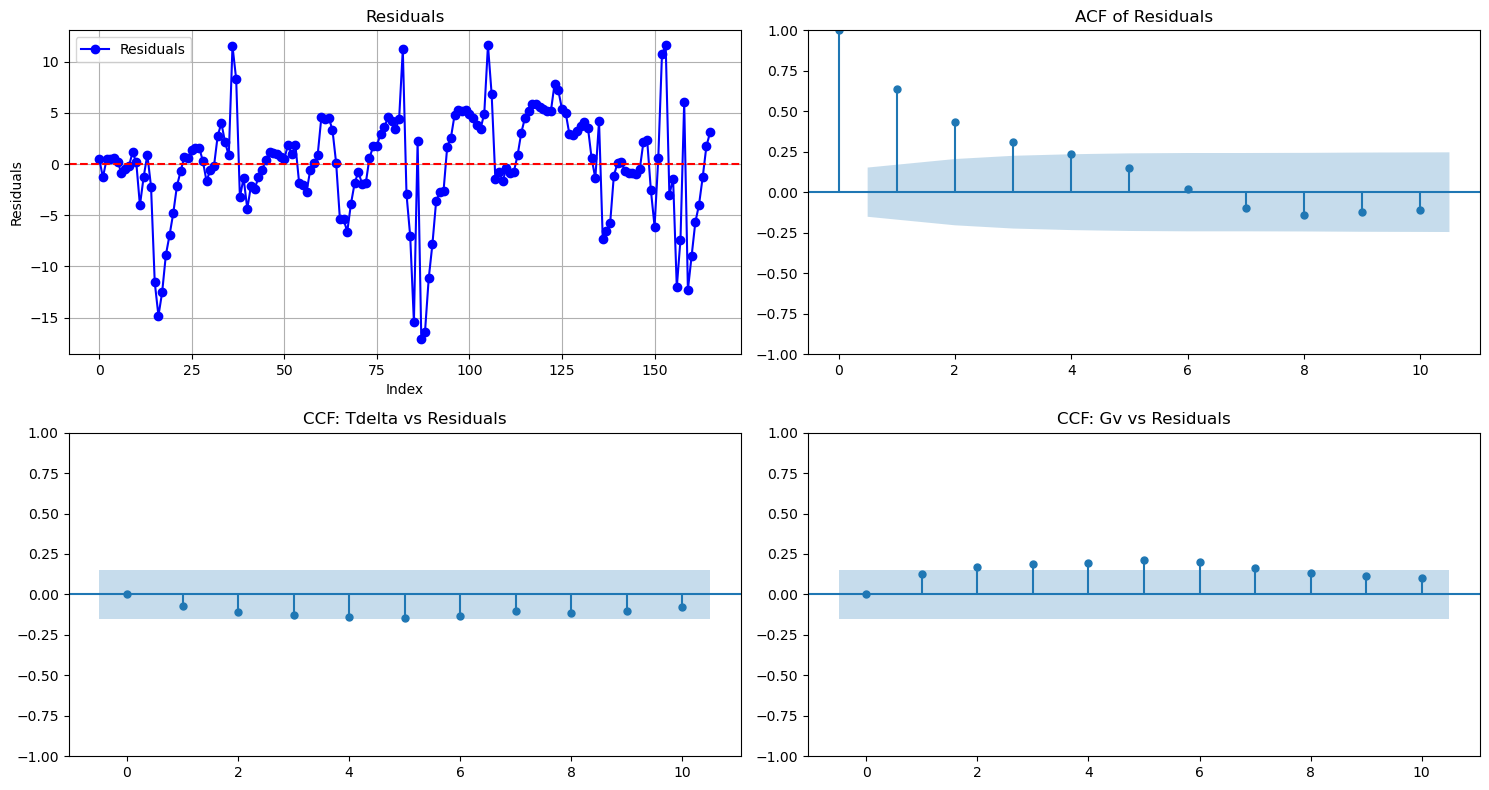

In [71]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_ccf

# Fit linear regression model
X = df_train[["Tdelta", "Gv"]]  # Independent variables
y = df_train["Ph"]  # Dependent variable
X = sm.add_constant(X)  # Add constant for intercept
model = sm.OLS(y, X).fit()

dlr=df_train[['Ph',"Tdelta", "Gv"]]

# One-step prediction
dlr["Predicted_Ph"] = model.predict(X)

# Residuals
dlr["Residuals"] = y - dlr["Predicted_Ph"]

# Analyze model results
print(model.summary())

# Plotting Residuals, ACF and CCF
plt.figure(figsize=(15, 8))

# Residuals plot
plt.subplot(2, 2, 1)
plt.plot(dlr.index, dlr["Residuals"], marker="o", color="blue", label="Residuals")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.legend()
plt.grid()

# ACF (Autocorrelation Function) of residuals
plt.subplot(2, 2, 2)
plot_acf(dlr["Residuals"], lags=10, ax=plt.gca())
plt.title("ACF of Residuals")

# CCF (Cross-Correlation Function) between `Tdelta` and residuals
plt.subplot(2, 2, 3)
plot_ccf(dlr["Tdelta"], dlr["Residuals"], lags=10, ax=plt.gca())
plt.title("CCF: Tdelta vs Residuals")

# CCF between `Gv` and residuals
plt.subplot(2, 2, 4)
plot_ccf(dlr["Gv"], dlr["Residuals"], lags=10, ax=plt.gca())
plt.title("CCF: Gv vs Residuals")

plt.tight_layout()
plt.show()

Commentary
- Model Results:- Review the summary() output to assess the significance of predictors (Tdelta and Gv) and overall model fit (R-squared, p-values).

- Residual Analysis:- The residuals plot should ideally show no patterns, indicating that the error term assumptions hold.
- If residuals are correlated (non-random), it might suggest a need for a more sophisticated model, such as one with transfer functions.

- ACF and CCF:- ACF of residuals identifies autocorrelations and potential lagged dependencies.
- CCF between Tdelta/Gv and residuals highlights any relationships that were not captured by the linear regression model.

Analyze the Estimation Result: After estimating the parameters of your linear regression model for Ph (heating), assess how well the model fits the data. This involves examining the coefficients (ω1, ω2) and the associated statistical metrics (e.g., confidence intervals or p-values).

One-Step Prediction: Generate predictions for the heating (Ph) using the model, one time step ahead. Compare these predictions to the observed values to evaluate the model's accuracy.

Residual Analysis with Plots:

Residuals: Compute the differences between the observed and predicted Ph values.

Use plots to visualize the residuals, checking for patterns or trends that indicate model shortcomings.

This includes assessing the normality and independence of the residuals.

ACF and CCF:

ACF (Auto-Correlation Function): Examine the correlation of residuals with themselves over different lags. Ideally, there should be no significant correlations if the model fits well.

CCF (Cross-Correlation Function): Investigate how the residuals correlate with other variables, such as Tdelta or Gv. Unexpected correlations might suggest missing dynamics in the model.

Comment on Transfer Function Need: Based on your findings, discuss whether a transfer function model might be necessary. A transfer function allows for a more detailed representation of the dynamics between inputs (Tdelta, Gv) and the output (Ph), capturing delayed or cumulative effects that the current regression model might miss.